#### Problem Statement:-

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv("C:/Users/Hrushikesh/Desktop/avocado.csv")
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


- The dataframe has 14 columns which contain both features and target variable.

- In task 1, Average Price is the target variable which contain continuous data, so it is a regression type problem.

- In task 2, Region is the target variable which has classes, so it is a classification problem.

- The dataset contain both numeric as well as categorical data.

- The Unnamed column in the dataset is for indexing purpose so we will drop it

In [41]:
# Dropping the unnamed Column
data.drop("Unnamed: 0", axis=1, inplace=True)

In [42]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [43]:
data.shape

(18249, 13)

In [44]:
#checking the types of dataset

data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The columns in this datset contains three different types of data- float,integer and object datatype. There are 3 columns having object datatype that are categorical in nature which needs to be encoded. The Date column is showing object datatype.so splitting the date into month and day. since year column is already present,no need to separate it.

In [45]:
# Changing date column from object type to date type
data['Date']=pd.to_datetime(data['Date'])

In [46]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see that the date column has datetime datatype. Now splitting the data into months and day

In [47]:
data['Month'] = data['Date'].dt.month

In [48]:
data['Day'] = data['Date'].dt.day

Now we have separated Month and Day from Date Column and now column Date is no use, so dropping it.

In [49]:
data.drop("Date",axis=1,inplace=True)

In [50]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [51]:
data.shape

(18249, 14)

Now the dataset has 18249 rows and 14 columns as we added 2 more columns from date.

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [53]:
data.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [54]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

There are no null values present in the dataset

<AxesSubplot:>

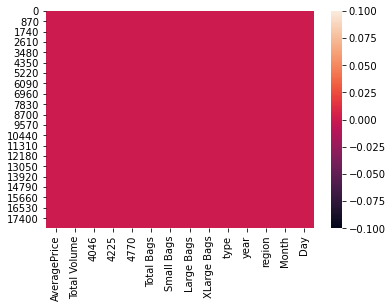

In [55]:
sns.heatmap(data.isnull())

We confirm also by visualization there are no missing values present in the dataset

In [56]:
data['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the missing values present in the dataset

In [57]:
data['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

In [58]:
data.loc[data['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


There are no spaces present in the dataset

In [59]:
# Statistical Summary of Dataset
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


From the above description we can observe the following things,

- The counts of all the columns are same so there are no null values present in the dataset.

- The AveragPrice Has mean which is bit greater than median, means it is skewed to the right.

- The mean and median are very close to each other in most of the columns like 4225,year,month,day which means the data is symmetrical in this columns.

- The mean is graeter than median in most of the columns which means they are skewed right.

- In some of the columns median is greater than the mean, hence they are skewed to the left.

- Most of the columns have nearly zero statistic summary also the mean and the standard deviation are very close to each other.

- By looking at the difference between max and 75%, we can infer there are outliers present in the most of the columns.


In [60]:
# Checking for Categirical columns
Categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        Categorical_col.append(i)
print(Categorical_col)

['type', 'region']


In [61]:
# Checking for Numerical columns
Numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        Numerical_col.append(i)
print(Numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Visualization

conventional    9126
organic         9123
Name: type, dtype: int64


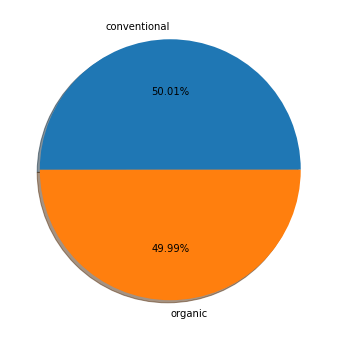

In [62]:
# Visualize the count of type of the avacodo
print(data['type'].value_counts())
labels = 'conventional','organic'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(data['type'].value_counts(), labels = labels,autopct='%1.2f%%',shadow=True)
plt.show()

We can observe both conventional and organic types of avacodo are equal in counts,which means both have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


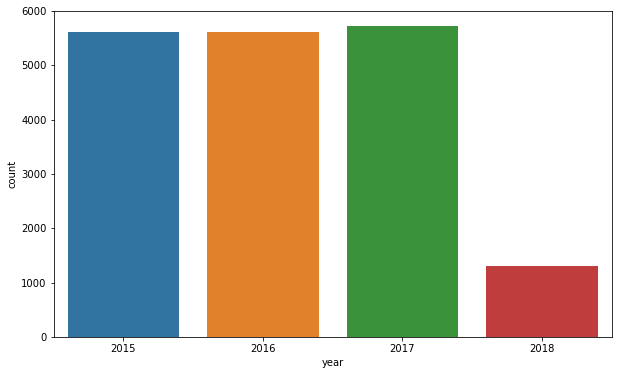

In [63]:
print(data['year'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(data['year'])
plt.show()

The count of 2017 is bit higher than 2016,2015,2018 has very less count,which means the price and the sales of avacado is less in this year.

SouthCentral           338
Roanoke                338
Houston                338
Albany                 338
Spokane                338
SanDiego               338
Columbus               338
BaltimoreWashington    338
RichmondNorfolk        338
Chicago                338
GreatLakes             338
Atlanta                338
NorthernNewEngland     338
CincinnatiDayton       338
StLouis                338
Sacramento             338
Detroit                338
Boston                 338
Plains                 338
Portland               338
Denver                 338
Pittsburgh             338
Northeast              338
SanFrancisco           338
Philadelphia           338
Nashville              338
Charlotte              338
Louisville             338
BuffaloRochester       338
HarrisburgScranton     338
SouthCarolina          338
TotalUS                338
NewYork                338
California             338
West                   338
Tampa                  338
MiamiFtLauderdale      338
N

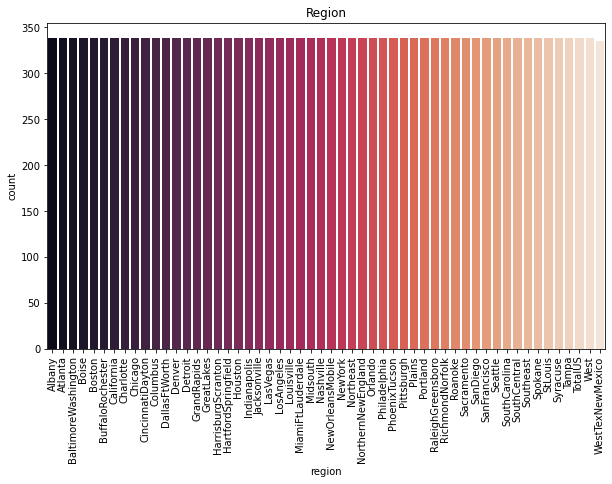

In [64]:
print(data['region'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(data['region'],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe that the count of avacodo is almost same in all the region, all of them have the count 338 but WestTestNewMexico has count 335 which is bit less than other regions.

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64


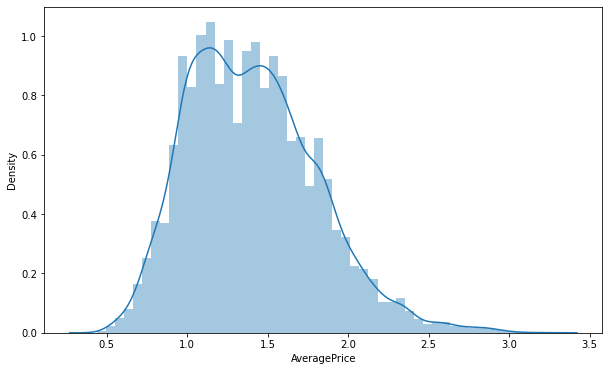

In [65]:
print(data['AveragePrice'].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(data['AveragePrice'])
plt.show()

We can visualize that the data is normally distributed in the label. Also the price of the avacado is more between 1.0-1.5

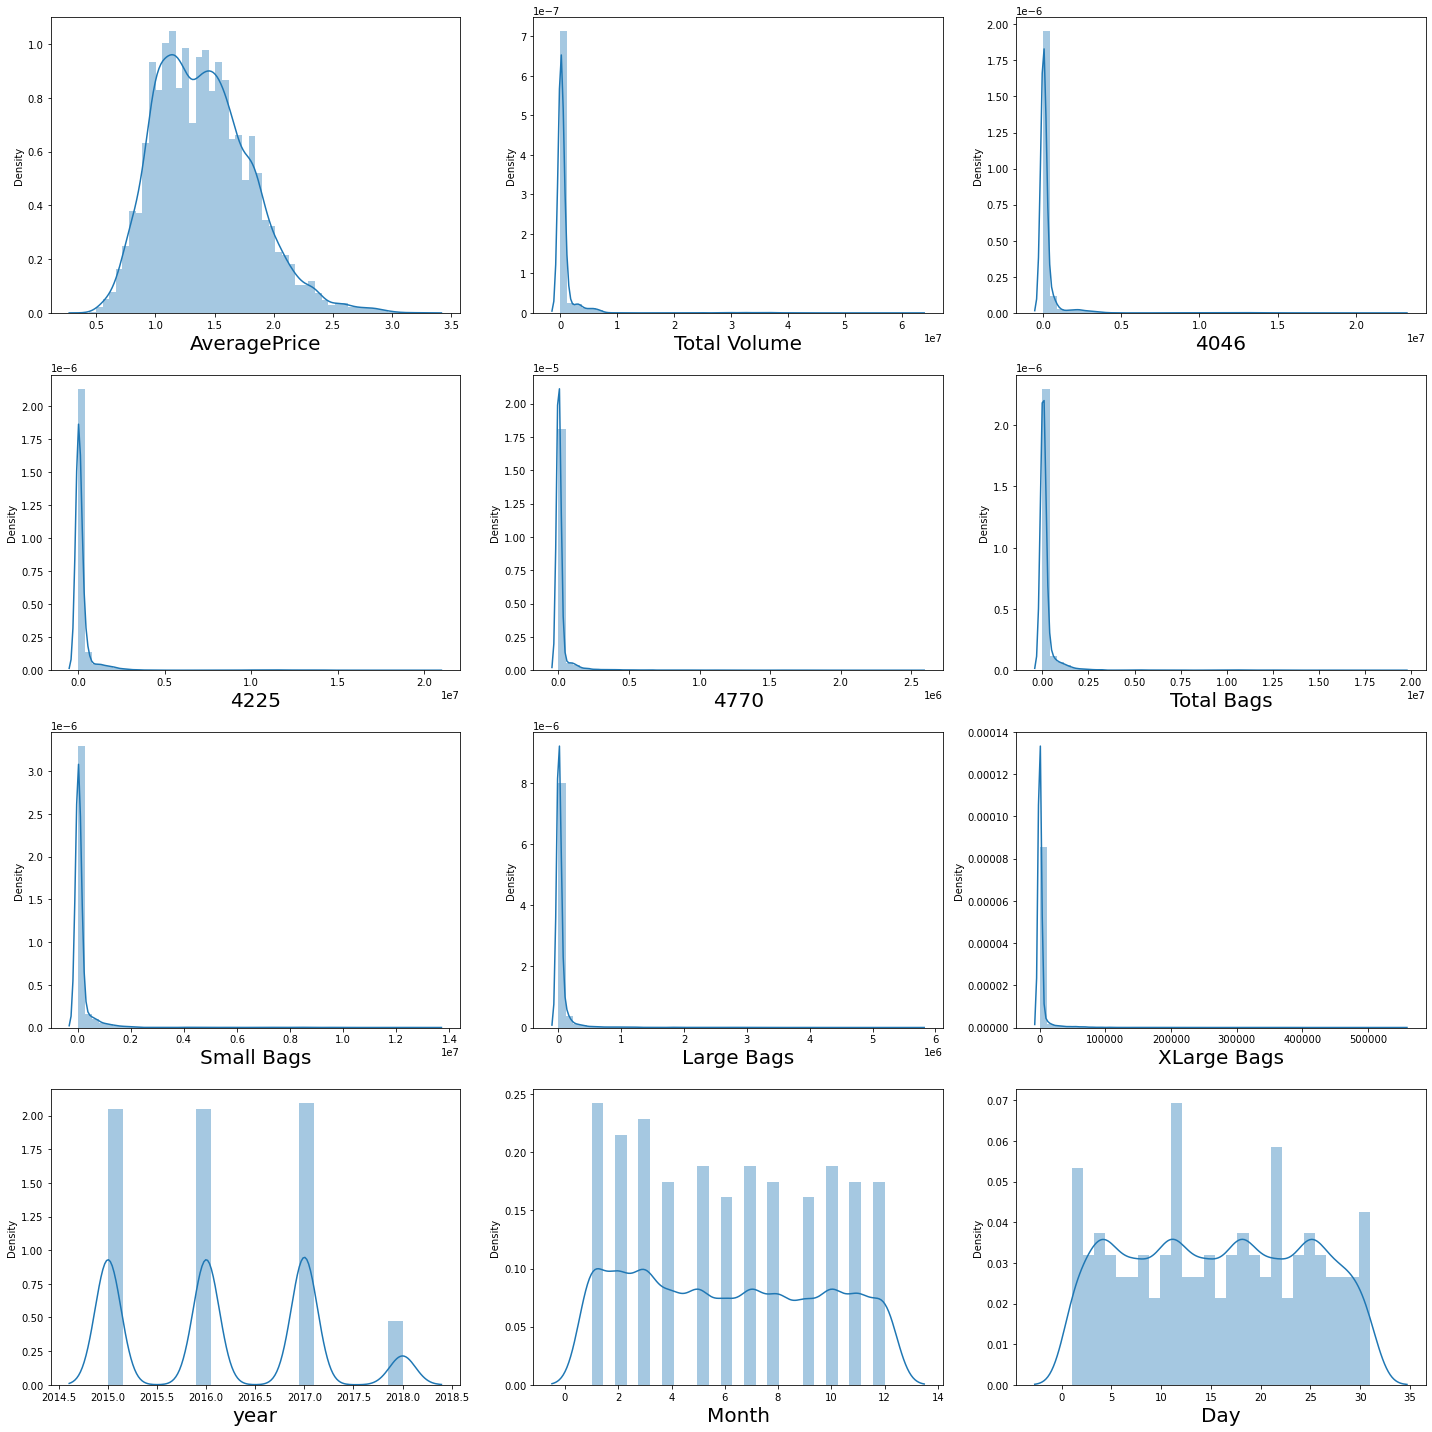

In [66]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in Numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the graph we can observe that none of the columns are normally distributed except the target column.Also there is a huge skewness in most of the features, most of them are skewed to the left.

# Bivariate Analysis:


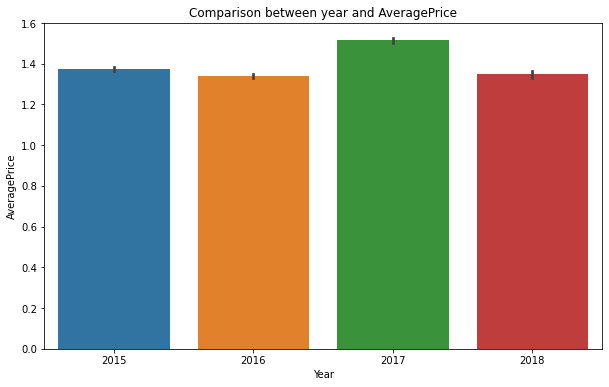

In [67]:
plt.figure(figsize=(10,6))
plt.title("Comparison between year and AveragePrice")
sns.barplot(data['year'],data['AveragePrice'], data=data)
plt.xlabel("Year")
plt.ylabel("AveragePrice")
plt.show()

The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015

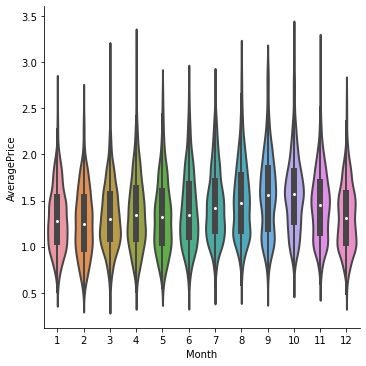

In [68]:
sns.catplot(x = "Month", y ="AveragePrice", kind = "violin", data=data, linewidth=2)

From the plot we can say that the AveragePrice remains high during 8,9 and 10 month and starts to fall from November onwords Also the price of avacodo is the months may to july and again there is an increament of price of avacoado in the month of April and March.

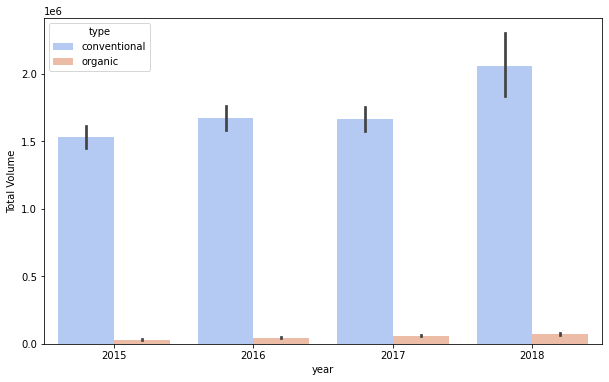

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y ='Total Volume',hue='type',data=data, palette='coolwarm',ci=68)
plt.show()

Conventional types were sold higher every year with low price than organic types which means the demand for conventional is also high. Also the total sales volumne is spotted in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017


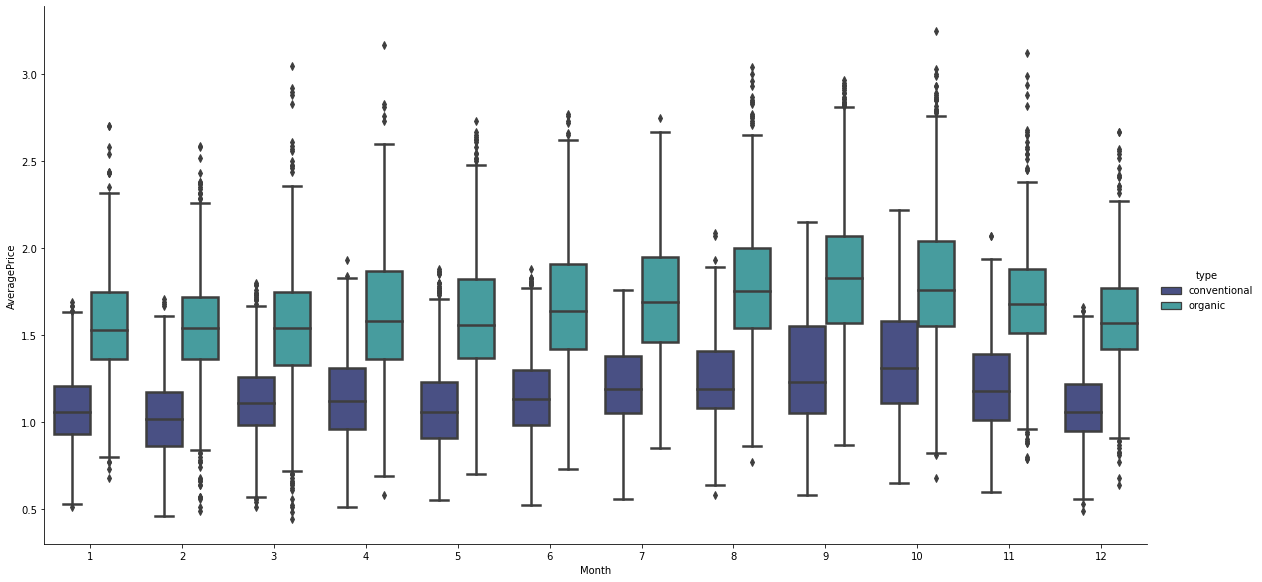

In [70]:
sns.catplot(x='Month',y='AveragePrice',hue='type',kind='box',data=data,height=8,linewidth=2.5,aspect=2,palette='mako')

Here we can notice that the AveragePrice of organic Avacado fruit is more than the conventional type. As we can observe the AveragePrice of both types of avacado is high in August, September and October and pulled it down in November.Also the price is high in April and March.

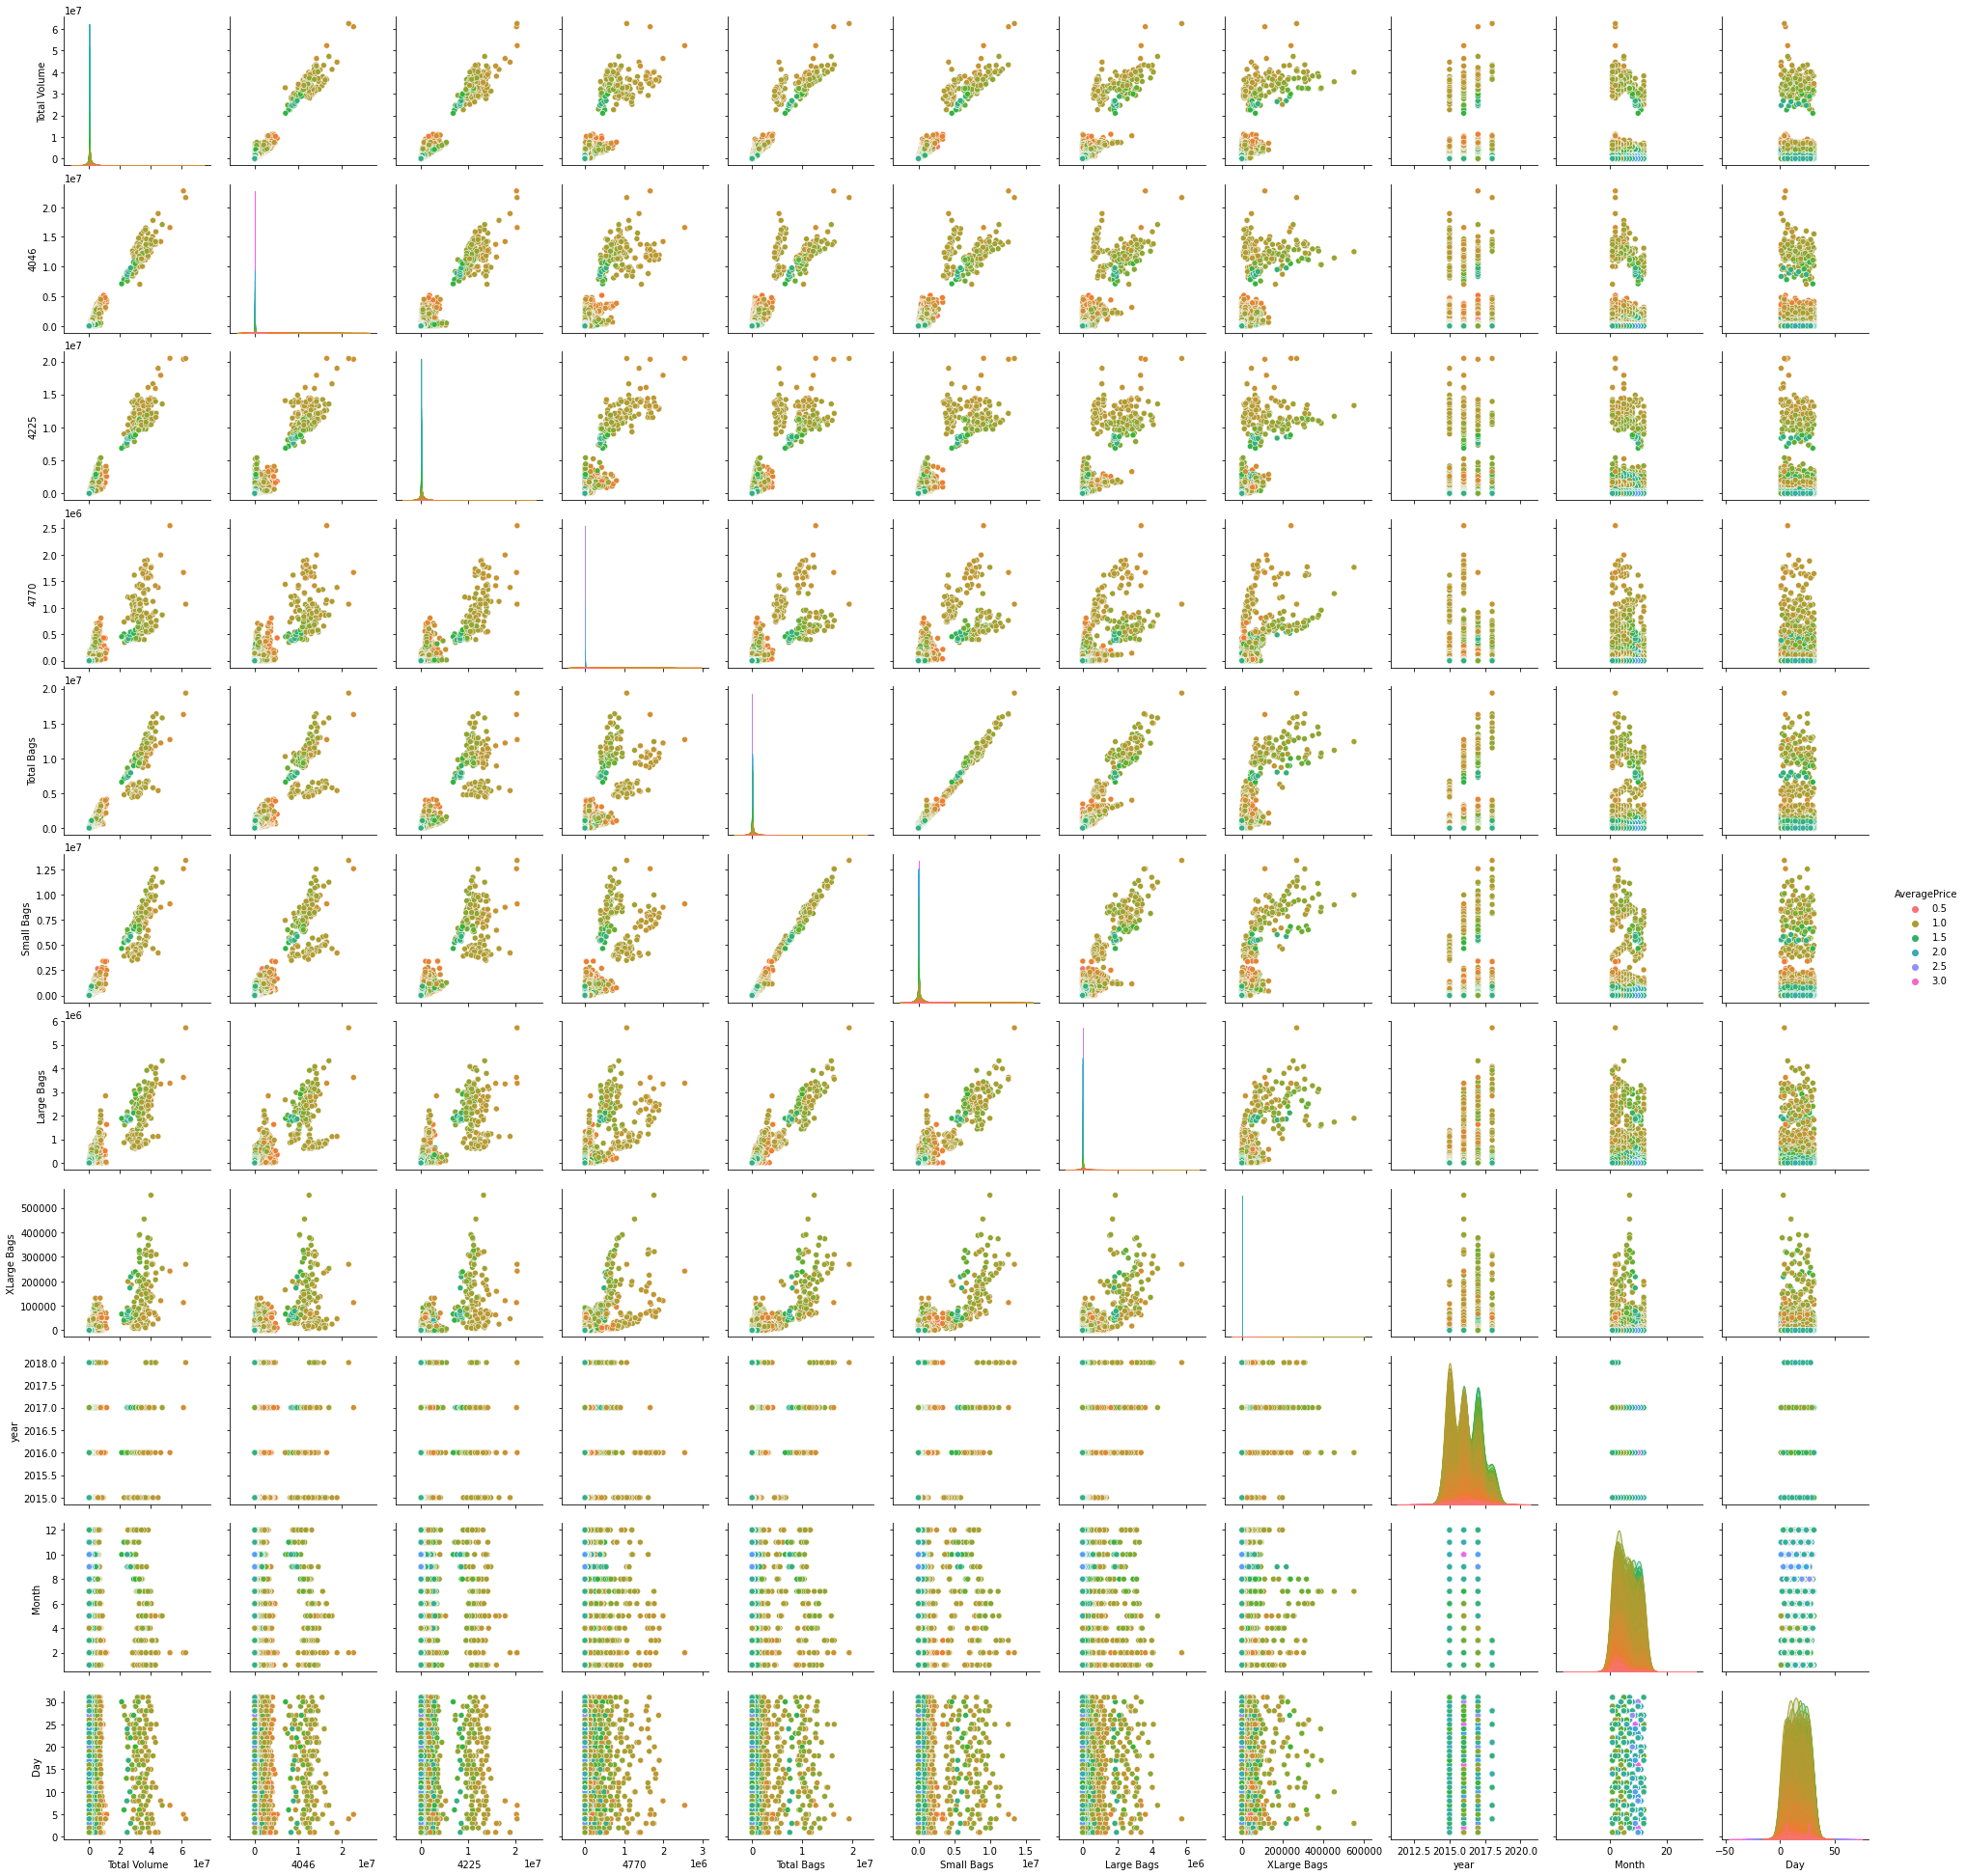

In [71]:
sns.pairplot(data,hue="AveragePrice",palette="husl")

This gives ther pairwise relationship between the columns which are plotted with respect to target variable AveragePrice. Here we can observe the relation between the features ands labels. From this pairplot we can observe that the existence of correlation between two variables and on the diagonal we see distribution plotting.

- Here we can state that there exists a linear relationship is most of the columns and other have no much relationship with each other.

- We can also observe the correlation between the features and some columns have outliers too.

- Day column is highly correlated with all the other features.

# Outliers

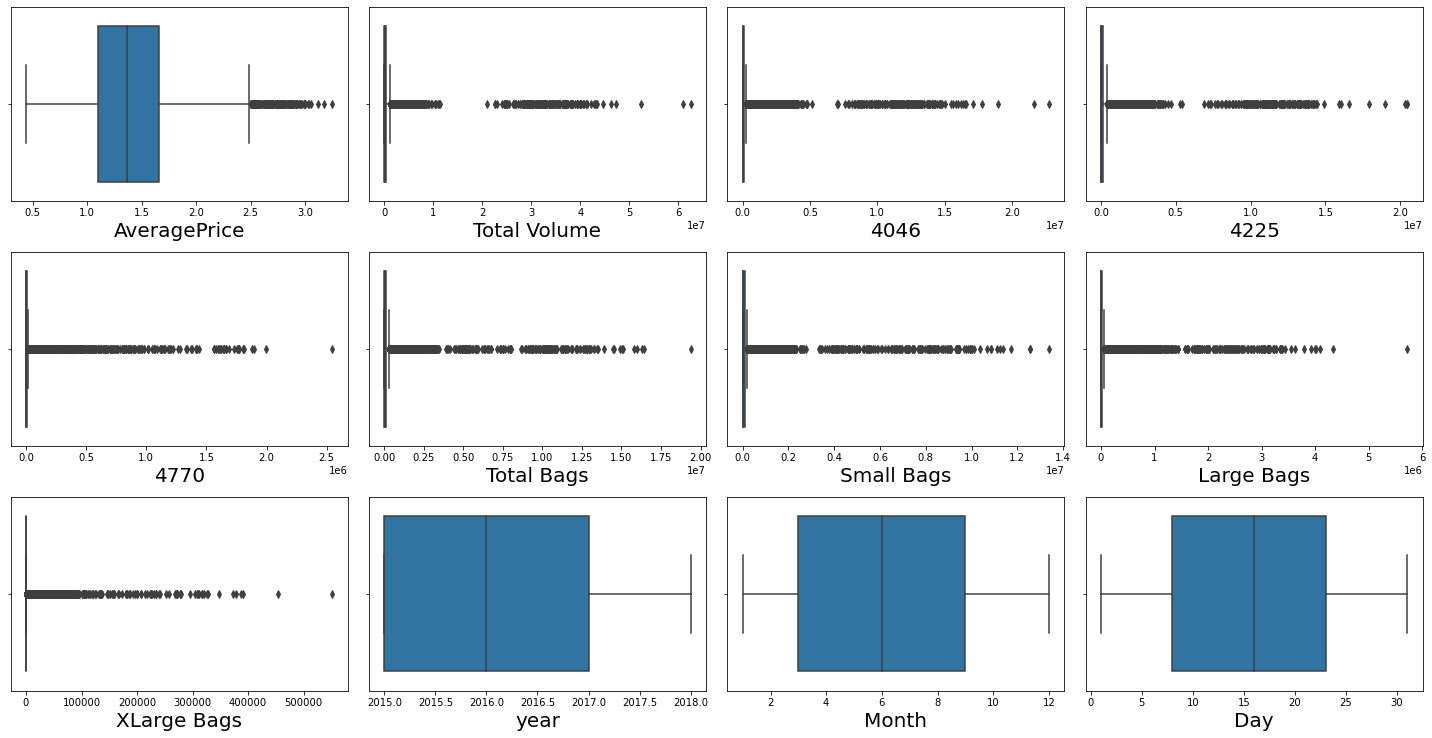

In [72]:
numerical_col = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=15:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see that there are heavy outliers present in almost every columns except year, Month and Day which needs to be removed. AveragePrice column also has outliers present but as it is target variable, we will not remove outliers present in it.

# Removing Outliers

In [73]:
from scipy.stats import zscore
features = data[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z = np.abs(zscore(features))
z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [74]:
new_data = data[(z<3).all(axis=1)]
new_data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [75]:
print(data.shape)
print(new_data.shape)

(18249, 14)
(17782, 14)


In [76]:
(18249-17782)/18429*100

2.5340495957458353

Using Zscore, we are loosing only 2.5% of data.Now trying with IQR

In [77]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

data1 = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]


In [78]:
print(data.shape)
print(data1.shape)

(18249, 14)
(11747, 14)


In [79]:
(18249-11747)/18249*100

35.62934955340019

Using IQR the data loss is quite high. So we would consider zscore

In [80]:
new_data.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

All the columns have skewness except year, Month and Day

In [81]:
skewed_features = ["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]



from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [82]:
new_data[skewed_features] = scaler.fit_transform(new_data[skewed_features].values)
new_data[skewed_features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


There is still skewness present in Xlarge bags. So, removing it using Long transformation

In [83]:
new_data['XLarge Bags']=np.log1p(new_data['XLarge Bags'])

In [84]:
new_data.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

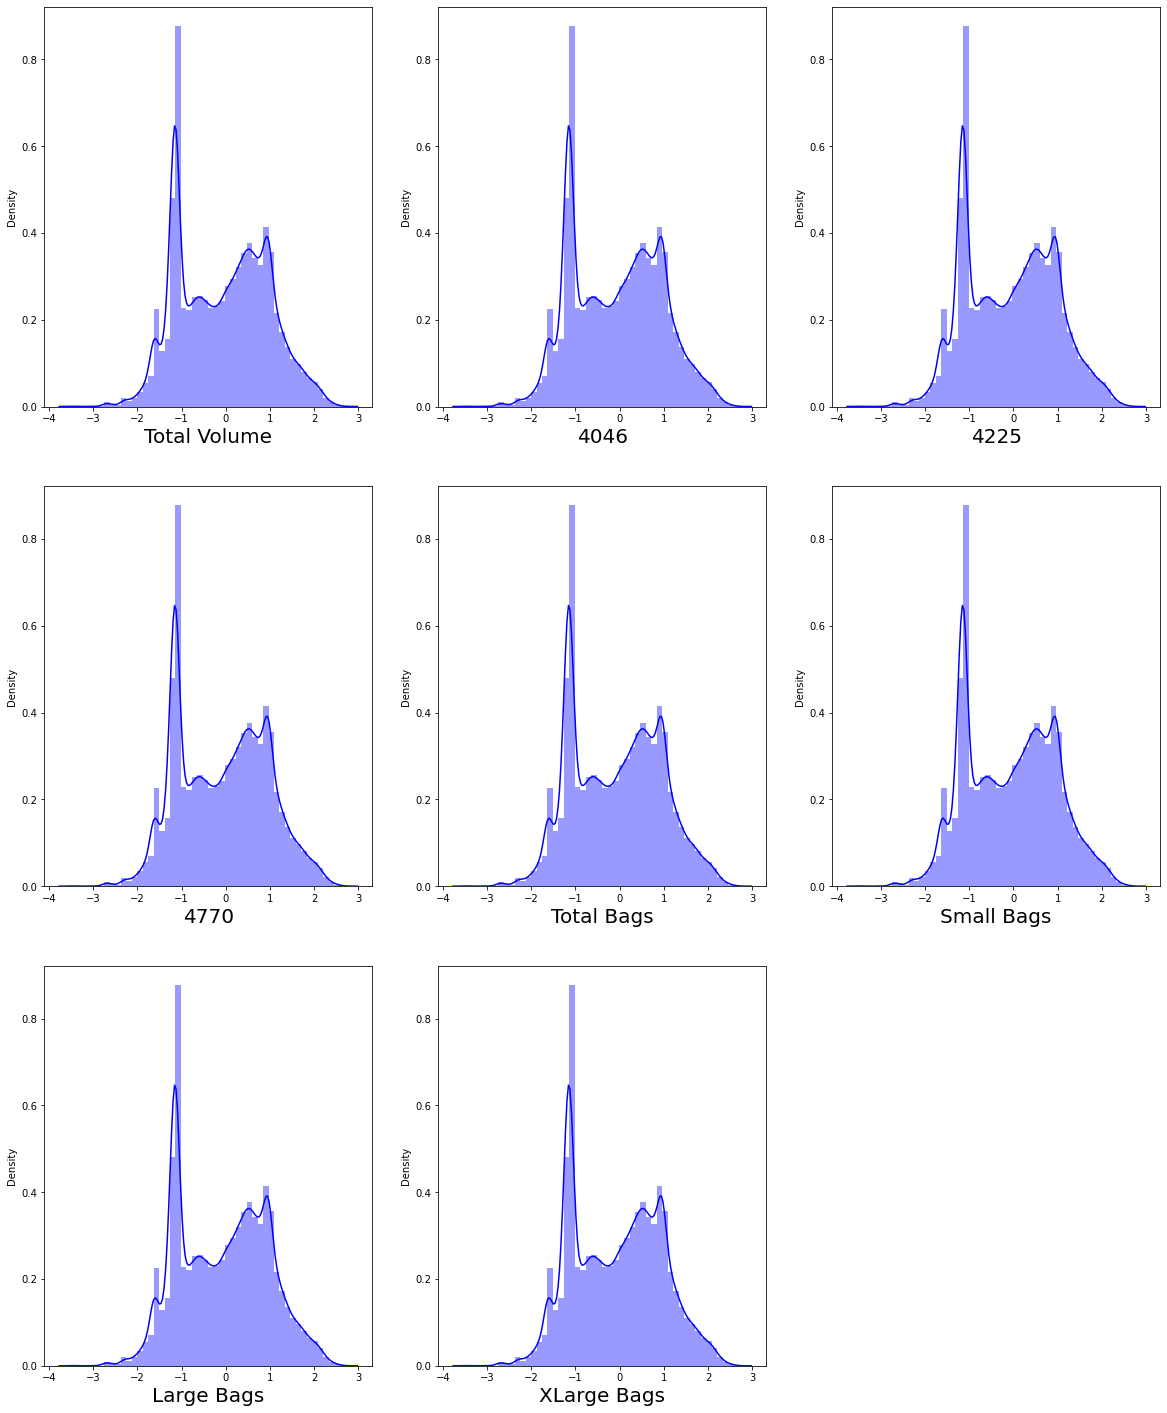

In [85]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_data[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[skewed_features],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Now the data looks normal to previous one and the skewness has been removed.

# Encoding Categorical Data


In [86]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['type','region']
lbl = LabelEncoder()
new_data[categorical_col]=new_data[categorical_col].apply(lbl.fit_transform)

In [87]:
new_data[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation

In [88]:
new_data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


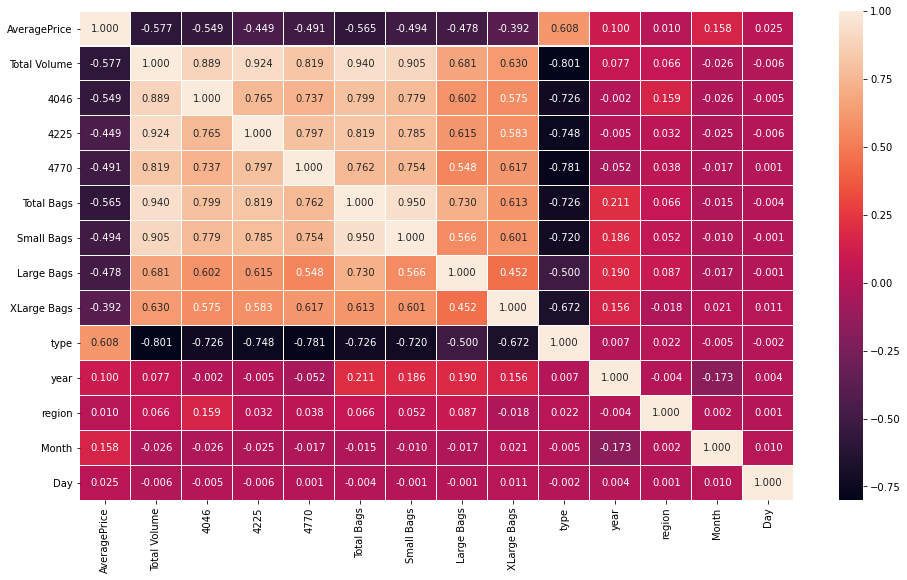

In [89]:
plt.figure(figsize=(16,9))
sns.heatmap(new_data.corr(),linewidths=.1,fmt="0.3f",annot=True)
plt.show()

The heatmap shows the correlation matrix by visalizing the data.We can observe the relation between one feature with another. This heatmap contains both positive and negative correlation.

- All columns have high negative correlation with target variable except year,month and type they have positive correlation

- The feature day and the region has no relation with target variable,So we can drop these columns

- Almost all the features are correlated with Each other which leads to multicollinearity problem which can be resolved using vif

- Also most of the columns have no correlation with each other and have zero correlation

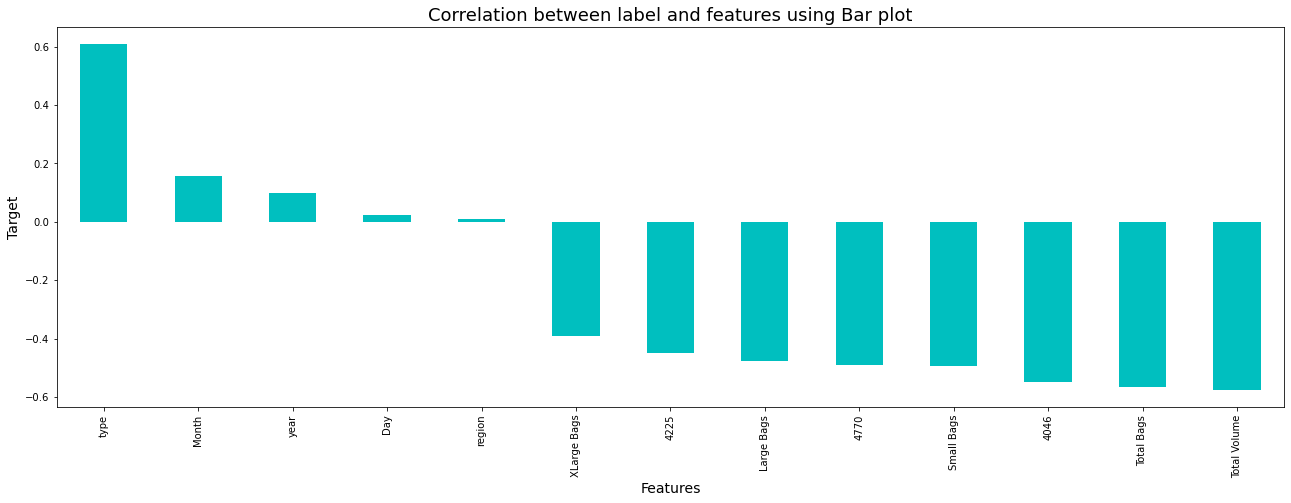

In [90]:
plt.figure(figsize=(22,7))
new_data.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()

The features day and region has very less correlation with the target variable so we can drop this columns.

In [91]:
new_data.drop('region',axis=1,inplace=True)
new_data.drop('Day',axis=1,inplace=True)

In [92]:
new_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


# Separating Features and Labels

In [93]:
x = new_data.drop('AveragePrice',axis=1)
y = new_data['AveragePrice']

In [94]:
x.shape

(17782, 11)

In [95]:
y.shape

(17782,)

In [96]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,11


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572


This is the scale data. As there is a multicollinearity problem we need to use vif


# Multicolinearity

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


The VIF values is more than 10 in the features Total Volume,4225,Total Bags, Small Bags and Large Bags.

In [99]:
data.drop('Total Volume',axis=1,inplace=True)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


The multi collinearity problem still exists so let's drop the features total bags which has high VIF values

In [101]:
data.drop('Total Bags',axis=1,inplace=True)

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


In [103]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706


# Modelling

In [104]:
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAcc = 0
maxRS = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    knn = KNN()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is", maxAcc,"at random state",maxRS)

Maximum r2 score is 0.8722597064485668 at random state 49


In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [106]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# RandomForestRegressor

In [107]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF = RF.predict(x_test)
print("R2_score:",r2_score(y_test,pred_RF))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_RF))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_RF))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_RF)))

R2_score: 0.8664656979490407
MAE: 0.10320652296157447
MSE: 0.10320652296157447
RMSE: 0.14840618287415275


The R2_score using RandomForestRegressor is 86%

# Linear Regression

In [108]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
print("R2_score:",r2_score(y_test,pred_LR))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_LR))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_LR))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_LR)))

R2_score: 0.560970806062683
MAE: 0.20820421362985356
MSE: 0.20820421362985356
RMSE: 0.2690929219870636


The R2_score using LinearRegression is 56%

# SVR

In [109]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("R2_score:",r2_score(y_test,pred_svr))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_svr))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_svr))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_svr)))

R2_score: 0.777593514905538
MAE: 0.1399455036304599
MSE: 0.1399455036304599
RMSE: 0.1915266875898345


The R2_score using SVR is 77%

# SGD

In [110]:
SGD = SGDRegressor()
SGD.fit(x_train,y_train)
pred_SGD = SGD.predict(x_test)
print("R2_score:",r2_score(y_test,pred_SGD))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_SGD))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_SGD))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_SGD)))

R2_score: 0.5601293225484772
MAE: 0.20819572370928235
MSE: 0.20819572370928235
RMSE: 0.2693506825893597


The R2 Score using SGD is 55%

# KNN Regressor

In [111]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_score:",r2_score(y_test,pred_knn))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_knn))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_knn))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_knn)))

R2_score: 0.8722597064485668
MAE: 0.10231452671040299
MSE: 0.10231452671040299
RMSE: 0.1451508319343933


The R2 Score using KNN is 87%

# Gradient Boosting Regressor

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_GB))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_GB))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_GB)))

R2_score: 0.7223720057573315
MAE: 0.16172791666696973
MSE: 0.16172791666696973
RMSE: 0.21398690736222972


The R2 Score using GradientBoostingRegressor is 77%

# Cross Validation Score

In [113]:
print("Cross_validation_Score Of RandomForestRegressor is:",cross_val_score(RF,x,y,cv=5).mean())
print("Cross_validation_Score Of LinearRegression is:",cross_val_score(LR,x,y,cv=5).mean())
print("Cross_validation_Score Of SVR is:",cross_val_score(svr,x,y,cv=5).mean())
print("Cross_validation_Score Of SGD is:",cross_val_score(SGD,x,y,cv=5).mean())
print("Cross_validation_Score Of KNN is:",cross_val_score(knn,x,y,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingRegressor is:",cross_val_score(GB,x,y,cv=5).mean())

Cross_validation_Score Of RandomForestRegressor is: 0.19202170291826198
Cross_validation_Score Of LinearRegression is: 0.22215096483154015
Cross_validation_Score Of SVR is: 0.19228045884536615
Cross_validation_Score Of SGD is: 0.23259366956398728
Cross_validation_Score Of KNN is: 0.0500311285788672
Cross_validation_Score Of GradientBoostingRegressor is: 0.34991476820149137


From the difference between r2_score and cross validation score, we can conclude that KNN is our best fit model

# Hyperparameter Tuning

In [114]:
from sklearn.model_selection  import GridSearchCV

In [115]:
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance']}

In [116]:
GCV = GridSearchCV(KNN(),parameters,cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [118]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [119]:
avacado = KNN(algorithm='auto', leaf_size=10,n_neighbors=4,weights='distance')
avacado.fit(x_train,y_train)
pred = avacado.predict(x_test)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred_RF)))
print('R2_score :', r2_score(y_test,pred)*100)

RMSE value : 0.14840618287415275
R2_score : 88.9932165604187


After tuning the r2_score of the model is increased and it is 88%

# Saving The Model

In [120]:
import joblib
joblib.dump(avacado,'Avacado.pkl')

['Avacado.pkl']

In [121]:
model = joblib.load('Avacado.pkl')

# Predictions

In [122]:
a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1.19,1.194206
1,1.88,1.810913
2,1.82,1.819043
3,1.04,0.996181
4,1.10,1.183572
...,...,...
5330,1.66,1.756290
5331,0.70,0.722224
5332,1.54,1.597495
5333,1.60,1.539409


Here we can see that both original and predicted values are almost identical

# Task 2

#### We need to find the region of Avacado observation. There are 53 different regions in the dataset. So, its a type of multo-classification problem.

In [123]:
data_region = pd.read_csv("C:/Users/Hrushikesh/Desktop/Company Material/avocado.csv")
data_region

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [124]:
data_region['region'].value_counts()

SouthCentral           338
Roanoke                338
Houston                338
Albany                 338
Spokane                338
SanDiego               338
Columbus               338
BaltimoreWashington    338
RichmondNorfolk        338
Chicago                338
GreatLakes             338
Atlanta                338
NorthernNewEngland     338
CincinnatiDayton       338
StLouis                338
Sacramento             338
Detroit                338
Boston                 338
Plains                 338
Portland               338
Denver                 338
Pittsburgh             338
Northeast              338
SanFrancisco           338
Philadelphia           338
Nashville              338
Charlotte              338
Louisville             338
BuffaloRochester       338
HarrisburgScranton     338
SouthCarolina          338
TotalUS                338
NewYork                338
California             338
West                   338
Tampa                  338
MiamiFtLauderdale      338
N

In [125]:
data_region['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [126]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
data_region['region']=lbl.fit_transform(data_region['region'])

In [127]:
data_region['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

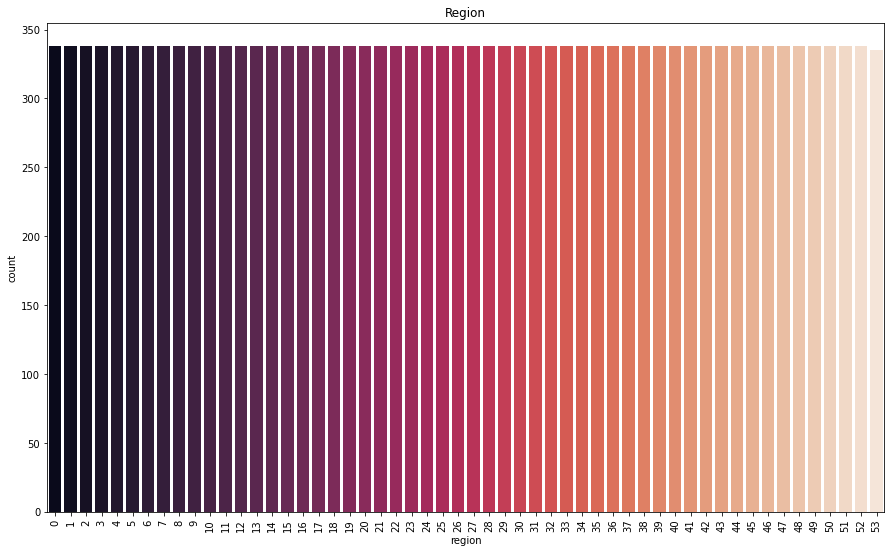

In [128]:
plt.figure(figsize=(15,9))
sns.countplot(data_region['region'],palette="rocket")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

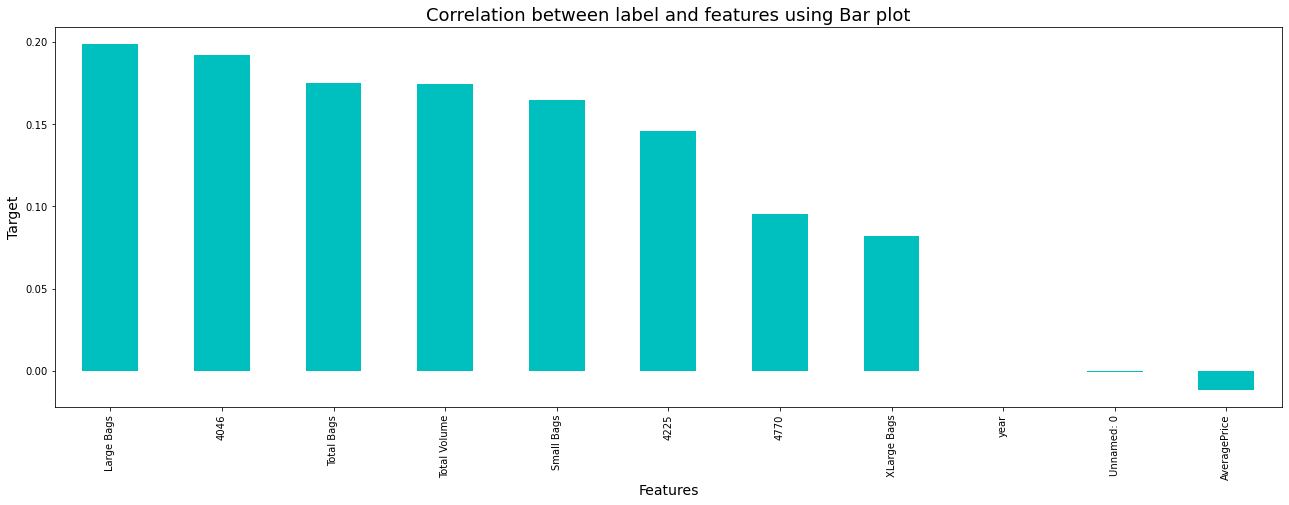

In [129]:
plt.figure(figsize=(22,7))
data_region.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()

We can drop the columns Unnamed and year as they are irrelevant

In [130]:
data_region.drop("Unnamed: 0",axis=1,inplace=True)
data_region.drop("year",axis=1,inplace=True)

In [131]:
data_region['Date'] = pd.to_datetime(data_region['Date'])

In [132]:
data_region['Month'] = data_region['Date'].dt.month

In [133]:
data_region['Day'] = data_region['Date'].dt.day

In [134]:
data_region.drop("Date",axis=1,inplace=True)

In [135]:
data_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,11,29


In [136]:
data_region['type'] = lbl.fit_transform(data_region['type'])

In [137]:
x = data_region.drop(['region'],axis=1)
y = data_region['region']

In [138]:
x.shape

(18249, 12)

In [139]:
y.shape

(18249,)

# Standard Scalar

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)
x

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.99983562,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.99983562,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.99983562,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.00016441,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.00016441,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.00016441,
        -1.46495942, -0.98707516]])

# Finding Best Random State

In [141]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    LM = LogisticRegression()
    LM.fit(x_train,y_train)
    predlm = LM.predict(x_test)
    acc = accuracy_score(y_test,predlm)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("The best Accuracy is", maxAccu,"at random state",maxRS)

The best Accuracy is 0.3304109589041096 at random state 199


We found that the best Random state is 199. We will create train_test_split as random state=199

In [143]:
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=199)


# LogisticRegression

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.3304109589041096
[[ 30   0   0 ...   0   0   0]
 [  5  26   0 ...   0   0   0]
 [  0   0  42 ...   0   0   0]
 ...
 [  0   0   0 ... 100   7   0]
 [  0   0   0 ...   1  61   0]
 [  1   1   0 ...   0   0  21]]
              precision    recall  f1-score   support

           0       0.18      0.32      0.23        95
           1       0.51      0.27      0.36        95
           2       0.62      0.43      0.51        97
           3       0.07      0.34      0.11        94
           4       0.44      0.23      0.30       101
           5       0.31      0.23      0.27        96
           6       0.73      0.58      0.64       102
           7       0.16      0.32      0.21        94
           8       0.46      0.46      0.46       113
           9       0.27      0.51      0.35        92
          10       0.16      0.18      0.17        99
          11       0.20      0.55      0.29        96
          12       0.51      0.36      0.42       109
          13       0.74      0.2

From logistic regression we get 33% Accuracy

# RandomForestClassifier

In [145]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.9004566210045662
[[ 85   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1 104   0]
 [  0   1   0 ...   0   0  88]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        95
           1       0.81      0.88      0.84        95
           2       0.94      0.99      0.96        97
           3       0.86      0.84      0.85        94
           4       0.92      0.90      0.91       101
           5       0.90      0.78      0.84        96
           6       0.96      0.98      0.97       102
           7       0.92      0.93      0.92        94
           8       0.98      0.96      0.97       113
           9       0.93      0.85      0.89        92
          10       0.83      0.91      0.87        99
          11       0.97      0.96      0.96        96
          12       0.99      0.90      0.94       109
          13       0.84      0.8

From RandomForest we get 89% Accuracy

# DecisionTreeClassifier

In [146]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.765296803652968
[[ 71   0   0 ...   0   0   0]
 [  0  69   0 ...   0   0   1]
 [  0   0  85 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   1  97   0]
 [  0   2   1 ...   0   0  65]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        95
           1       0.65      0.73      0.69        95
           2       0.89      0.88      0.88        97
           3       0.67      0.79      0.73        94
           4       0.79      0.76      0.77       101
           5       0.70      0.71      0.70        96
           6       0.93      0.98      0.96       102
           7       0.86      0.78      0.82        94
           8       0.93      0.92      0.92       113
           9       0.75      0.71      0.73        92
          10       0.59      0.60      0.59        99
          11       0.82      0.77      0.80        96
          12       0.86      0.75      0.80       109
          13       0.71      0.67

From DecisionTree we get 76% Accuracy

# SVC

In [147]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.228675799086758
[[ 4  0  1 ...  0  0  0]
 [ 6 16  2 ...  0  0  5]
 [ 3  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  1  0]
 [ 0  0  0 ...  1 53  0]
 [ 3  7  2 ...  0  0 24]]
              precision    recall  f1-score   support

           0       0.02      0.04      0.03        95
           1       0.31      0.17      0.22        95
           2       0.25      0.42      0.32        97
           3       0.00      0.00      0.00        94
           4       0.35      0.13      0.19       101
           5       0.07      0.25      0.11        96
           6       0.92      0.47      0.62       102
           7       0.07      0.02      0.03        94
           8       0.96      0.47      0.63       113
           9       0.47      0.18      0.27        92
          10       0.05      0.07      0.06        99
          11       0.15      0.65      0.25        96
          12       0.80      0.33      0.47       109
          13       0.81      0.23      0.36       107
          14   

From SVC we get 22% Accuracy

# GradientBoostingClassifier

In [148]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8168036529680365
[[ 81   0   0 ...   0   0   0]
 [  0  64   0 ...   0   0   2]
 [  0   0  92 ...   0   0   0]
 ...
 [  0   0   0 ... 104   4   0]
 [  0   0   0 ...   1 101   0]
 [  0   0   2 ...   0   0  75]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        95
           1       0.74      0.67      0.70        95
           2       0.88      0.95      0.91        97
           3       0.85      0.79      0.82        94
           4       0.87      0.77      0.82       101
           5       0.73      0.75      0.74        96
           6       0.98      0.94      0.96       102
           7       0.87      0.85      0.86        94
           8       0.98      0.93      0.95       113
           9       0.85      0.73      0.78        92
          10       0.65      0.77      0.70        99
          11       0.82      0.84      0.83        96
          12       0.92      0.82      0.86       109
          13       0.78      0.8

From GradientBoostingClassifier we get 81% Accuracy

# Cross Validation

In [149]:
print("Cross_validation_Score Of LogisticRegression is:",cross_val_score(lr,x,y,cv=5).mean())
print("Cross_validation_Score Of RandomForestClassifier is:",cross_val_score(RF,x,y,cv=5).mean())
print("Cross_validation_Score Of DecisionTreeClassifier is:",cross_val_score(DT,x,y,cv=5).mean())
print("Cross_validation_Score Of SVC is:",cross_val_score(svc,x,y,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingRegressor is:",cross_val_score(GB,x,y,cv=5).mean())

Cross_validation_Score Of LogisticRegression is: 0.2619779935955432
Cross_validation_Score Of RandomForestClassifier is: 0.6651218235808647
Cross_validation_Score Of DecisionTreeClassifier is: 0.5474735881851662
Cross_validation_Score Of SVC is: 0.2049352459108707
Cross_validation_Score Of GradientBoostingRegressor is: 0.6013913663717212


 The Best fit Model is RandomForestClassifier
    

# Hyper Parameter Tuning

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
parameters={"n_estimators":[10,100,500],'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters,cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}

In [152]:
y_pred = clf.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))

Accuracy Score: 0.9957990867579909
Confusion Matrix: [[ 95   0   0 ...   0   0   0]
 [  0  95   0 ...   0   0   0]
 [  0   0  97 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   0   0 ...   0   0 110]]
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.99      1.00      0.99        95
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00        94
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00       102
           7       1.00      1.00      1.00        94
           8       1.00      1.00      1.00       113
           9       0.99      0.99      0.99        92
          10       0.98      0.99      0.98        99
          11       1.00      1.00      1.00        96
          12       1.00      0

### After Hyper Parameter Tuning we got 99% Accuracy Score.

# Saving The Model

In [153]:
import joblib
joblib.dump(avacado,'Avacado_region.pkl')

['Avacado_region.pkl']